## Basic Deep Learning  

<hr>  

### 문제  
- 한 장의 풍경 이미지가 주어졌을 때, 어떤 카테고리에 속하는지를 맞추는 분류 모델 설계
- 가장 간단한 CNN 모델인 [LeNet(1998)](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf) 를 사용
- 이 Practice 에서는 meta의 [pytorch](https://pytorch.org/) 라이브러리를 사용. 
- 빠른 결과 도출을 위해 대략 30 epoch 정도만 학습.
- https://github.com/wooy0ng/image_classification 데이터사용

<br><hr>

### Download datasets
- 아래의 코드를 실행하여 데이터셋을 다운로드 받으세요
- 폴더 안으로 이동합니다.

In [1]:
!git clone https://github.com/wooy0ng/image_classification
%cd image_classification

C:\Users\jimflower\dsac\level2\image_classification


Cloning into 'image_classification'...
Updating files:  12% (2117/17034)
Updating files:  13% (2215/17034)
Updating files:  14% (2385/17034)
Updating files:  15% (2556/17034)
Updating files:  16% (2726/17034)
Updating files:  17% (2896/17034)
Updating files:  18% (3067/17034)
Updating files:  19% (3237/17034)
Updating files:  20% (3407/17034)
Updating files:  21% (3578/17034)
Updating files:  22% (3748/17034)
Updating files:  23% (3918/17034)
Updating files:  24% (4089/17034)
Updating files:  24% (4199/17034)
Updating files:  25% (4259/17034)
Updating files:  26% (4429/17034)
Updating files:  27% (4600/17034)
Updating files:  28% (4770/17034)
Updating files:  29% (4940/17034)
Updating files:  30% (5111/17034)
Updating files:  31% (5281/17034)
Updating files:  32% (5451/17034)
Updating files:  33% (5622/17034)
Updating files:  34% (5792/17034)
Updating files:  35% (5962/17034)
Updating files:  36% (6133/17034)
Updating files:  36% (6281/17034)
Updating files:  37% (6303/17034)
Updating 

In [1]:
%cd Rice_Image_Dataset

c:\Users\jimflower\dsac\level2\Rice_Image_Dataset


### Dataset Information
- 클래스 별 데이터의 개수를 확인해봅시다.
- 총 train 데이터의 개수는 13,627개입니다.
- 총 test 데이터의 개수는 3,407개입니다.

In [2]:
import os

classes = ['ArBorio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']
train_path = 'train/'
test_path = 'test/'

print("[ train dataset ]")
for i in range(5):
    print(f'class {i}의 개수: {len(os.listdir(train_path + classes[i]))}')

print("\n[ test dataset ]")
for i in range(5):
    print(f'class {i}의 개수: {len(os.listdir(test_path + classes[i]))}')

[ train dataset ]
class 0의 개수: 12000
class 1의 개수: 12000
class 2의 개수: 12000
class 3의 개수: 12000
class 4의 개수: 12000

[ test dataset ]
class 0의 개수: 3000
class 1의 개수: 3000
class 2의 개수: 3000
class 3의 개수: 3000
class 4의 개수: 3000


### Augmentation, Normalization
- 이미지 Augmentation을 수행합니다.
  - RandomResizedCrop() : 학습 시 Random으로 이미지의 일부를 잘라내어 특정 크기로 변환
  - RandomHorizontalFlip() : 학습 시 Random으로 이미지를 좌우 반전
- 이미지를 정규화시킵니다.
  - 일반적으로 많이 사용하는 ImageNet의 설정을 그대로 사용할 것입니다.

In [5]:
pip install torch

  Using cached torch-1.11.0-cp39-cp39-win_amd64.whl (157.9 MB)
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install torchvision

  Using cached torchvision-0.12.0-cp39-cp39-win_amd64.whl (1.0 MB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
import torch

torch.cuda.is_available()

False

In [9]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"{device} is available.")


transform_train = transforms.Compose([
    transforms.RandomResizedCrop((250, 250)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

transform_test = transforms.Compose([
    transforms.RandomResizedCrop((250, 250)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])


train_dataset = datasets.ImageFolder(train_path, transform_train)
test_dataset = datasets.ImageFolder(test_path, transform_test)

train_data_loader = DataLoader(
    train_dataset, 
    batch_size=32, 
    shuffle=True, 
    num_workers=2
)

test_data_loader = DataLoader(
    test_dataset, 
    batch_size=32, 
    shuffle=True, 
    num_workers=2
)

cpu is available.


In [10]:
print('Training dataset size:', len(train_dataset))
print('Validation dataset size:', len(test_dataset))

class_names = train_dataset.classes
print('Class names:', class_names)

Training dataset size: 60000
Validation dataset size: 15000
Class names: ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']


### Image Visualization
- 가지고 온 데이터를 시각화합니다.
- numpy 형태로 변환한 뒤에 matplotlib.pyplot를 사용할 것입니다.
  - torch.tensor는 (channel, height, width) 차원으로 구성되어 있습니다.
  - numpy는 (height, width, channel) 차원으로 구성되어 있습니다.

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision

plt.rcParams['figure.figsize'] = [30, 18]
plt.rcParams['figure.dpi'] = 60
plt.rcParams.update({
    'font.size': 20
})

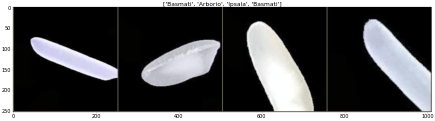

In [29]:
def imshow(image, title):
    image = image.numpy().transpose((1, 2, 0))

    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean
    image = np.clip(image, 0, 1)

    plt.imshow(image)
    plt.title(title)
    plt.show()


# get one batch
iterator = iter(train_data_loader)

# image visualization
inputs, classes = next(iterator)
out = torchvision.utils.make_grid(inputs[:4])
imshow(out, title=[class_names[x] for x in classes[:4]])



##### **Inline Practice 1**  

- LeNet Architecture는 1998년에 등장한 가장 간단한 CNN입니다.
- 최초로 Convolution, Pooling 연산을 사용한 Architecture입니다.
  
  
구조는 아래와 같습니다.
Layer | Type | Specification
:-: | :-: | ---
1 | Input | image size: 3 X 64 X 64
2 | Convolution |  of kernel: 20, kernel size: 5 X 5, stride: 1, zero padding: 0
3 | Pooling | max pooling, kernel size: 2 X 2, stride: 2
4 | Convolution |  of kernel: 50, kernel size: 5 X 5, stride: 1, zero padding: 0
5 | Pooling | max pooling, kernel size: 2 X 2, stride: 2
6 | Fully Connected |  of neuron: 500
7 | Activation | ReLU
8 | Fully Connected |  of neuron: 6
9 | Softmax | 6 classes


- Pytorch를 사용한다면 모델에 별도로 SoftMax layer를 두지 않고, 학습할 때 nn.CrossEntropyLoss()를 사용합니다.
- 여러분들은 위 구조를 참고하셔서 LeNet 모델을 설계하시면 됩니다.
<br><br>
<hr>

In [30]:
import torch.nn as nn
import torch.nn.functional as F


class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=20, kernel_size=5, stride=1)
        self.maxp1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=20, out_channels=50, kernel_size=5, stride=1) 
        self.maxp2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(in_features=50*13*13, out_features=500) 
        self.Re1 = nn.ReLU()
        self.fc2 = nn.Linear(in_features=500, out_features=5)


    def forward(self, x):
        x = self.conv1(x) 
        x = torch.tanh(x) # 활성함수 

        x = self.maxp1(x)

        x = self.conv2(x) 
        x = torch.tanh(x) 

        x = self.maxp2(x)

        x = x.view(-1, 50*13*13)
         
        x = self.fc1(x) 
        x = torch.tanh(x) 

        x = self.Re1(x)

        x = self.fc2(x) 
        x = torch.tanh(x)


        return x

In [16]:
pip install torchsummary

Note: you may need to restart the kernel to use updated packages.


In [31]:
import torchsummary

_device = device.type

model = LeNet().to(device)
torchsummary.summary(model, (3, 250, 250), device=_device)

RuntimeError: shape '[-1, 8450]' is invalid for input of size 348100

### Train 및 evaluate 함수 작성
- Train 함수와 Test 함수를 작성합니다.

In [35]:
def train(model, epoch, optimizer, criterion, data_loader):
    print(f"[train epoch : {epoch}]")
    model.train()

    losses = 0.
    correct = 0
    total = 0
    for inputs, targets in data_loader:
        inputs = inputs.to(device)
        targets = targets.to(device)

        outputs = model(inputs)
        loss = criterion(outputs, targets)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        losses += loss.item()
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()
    print(f"train accuracy : {100. * (correct / total):.3f}")
    print(f"train average loss : {losses / total:.3f}")

    return (100. * correct / total, losses / total)

def test(model, epoch, criterion, data_loader):
    print(f"[test epoch : {epoch}]")
    model.eval()

    losses = 0.
    correct = 0
    total = 0    
    
    for inputs, targets in data_loader:
        inputs = inputs.to(device)
        targets = targets.to(device)

        outputs = model(inputs)
        loss = criterion(outputs, targets)
        losses += loss.item()

        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()        

    print(f"test accuracy : {100. * (correct / total):.3f}")
    print(f"test average loss : {losses / total:.3f}")

    return (100. * correct / total, losses / total)


<hr><br>

##### **Inline Practice 2**  

- 위에서 정의한 LeNet를 학습과 동시에 검증하세요.
- 아래의 설정을 따라 모델을 학습시키세요.
  - epoch : 30
  - learning_rate = 0.0005 (5e-4)
  - criterion(loss function) : crossEntropy
  - optimizer : Adam

<br><hr>

In [36]:
import pandas as pd
df1 = pd.DataFrame(index=range(0,30), columns=['epoch', 'testacc','trainacc','testloss','trainloss'])

In [104]:
import time
import torch.optim as optim
from torch.utils.data import  TensorDataset, DataLoader

model = LeNet()
model = model.to(device)

'''
input options
'''



criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005)
epochs = 30


train_result = []
test_result = []

start_time = time.time()
for epoch in range(epochs):
    '''
    train, test
    '''

    train_acc , train_loss = train(model, epoch, optimizer, criterion, train_data_loader)

    test_acc , test_loss = test(model, epoch, criterion, test_data_loader)

    df1['epoch'][epoch] = epoch
    df1['testacc'][epoch] = test_acc
    df1['trainacc'][epoch] = train_acc
    df1['testloss'][epoch] = test_loss
    df1['trainloss'][epoch] = train_loss
   
    
    # model_save
    if not os.path.isdir('checkpoint'):
        os.mkdir('checkpoint')
    torch.save(model.state_dict(), './checkpoint/model.pt')
    print(f"model save. ({time.time() - start_time:.3f}sec)\n\n")

    train_result.append((train_acc, train_loss))
    test_result.append((test_acc, test_loss))


[train epoch : 0]
train accuracy : 51.545
train average loss : 0.041
[test epoch : 0]
test accuracy : 58.057
test average loss : 0.038
model save. (44.739sec)


[train epoch : 1]


C:\Users\JIMFLO~1\AppData\Local\Temp/ipykernel_13560/4260390502.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['epoch'][epoch] = epoch
C:\Users\JIMFLO~1\AppData\Local\Temp/ipykernel_13560/4260390502.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['testacc'][epoch] = test_acc
C:\Users\JIMFLO~1\AppData\Local\Temp/ipykernel_13560/4260390502.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['trainacc'][epoch] = tr

train accuracy : 58.509
train average loss : 0.037
[test epoch : 1]
test accuracy : 61.109
test average loss : 0.037
model save. (89.909sec)


[train epoch : 2]
train accuracy : 60.901
train average loss : 0.036
[test epoch : 2]
test accuracy : 60.229
test average loss : 0.036
model save. (134.463sec)


[train epoch : 3]
train accuracy : 61.378
train average loss : 0.036
[test epoch : 3]
test accuracy : 63.575
test average loss : 0.035
model save. (179.059sec)


[train epoch : 4]
train accuracy : 63.315
train average loss : 0.035
[test epoch : 4]
test accuracy : 65.131
test average loss : 0.034
model save. (223.376sec)


[train epoch : 5]
train accuracy : 64.967
train average loss : 0.034
[test epoch : 5]
test accuracy : 65.747
test average loss : 0.034
model save. (267.477sec)


[train epoch : 6]
train accuracy : 66.155
train average loss : 0.034
[test epoch : 6]
test accuracy : 66.070
test average loss : 0.034
model save. (312.325sec)


[train epoch : 7]
train accuracy : 66.067
train

<hr><br>

##### **Inline Practice 3**  

- 학습 및 검증 결과를 시각화하세요.
- matplotlib을 사용하여 학습 및 검증 결과를 시각화하세요.
  - 여러분이 원하시는대로 시각화하면 됩니다.

<br><hr>

In [105]:
df1.to_csv('./checkpoint/df1.csv',index= False)

In [106]:
df1 = pd.read_csv('./checkpoint/df1.csv')

<AxesSubplot:xlabel='epoch'>

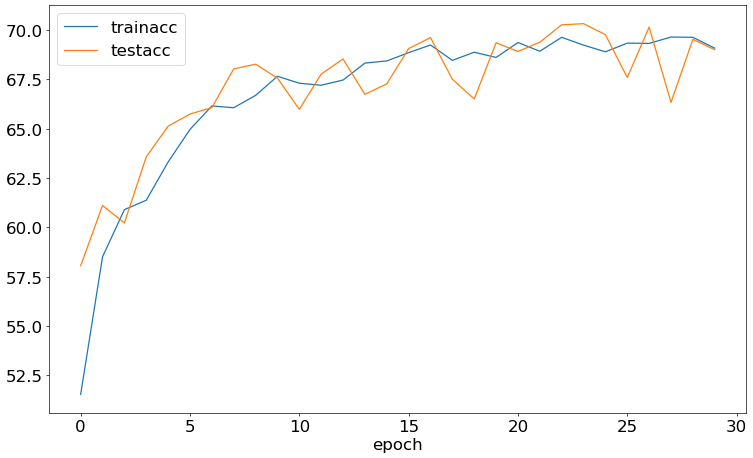

In [107]:
df1.plot('epoch',{'testacc','trainacc'})

<AxesSubplot:xlabel='epoch'>

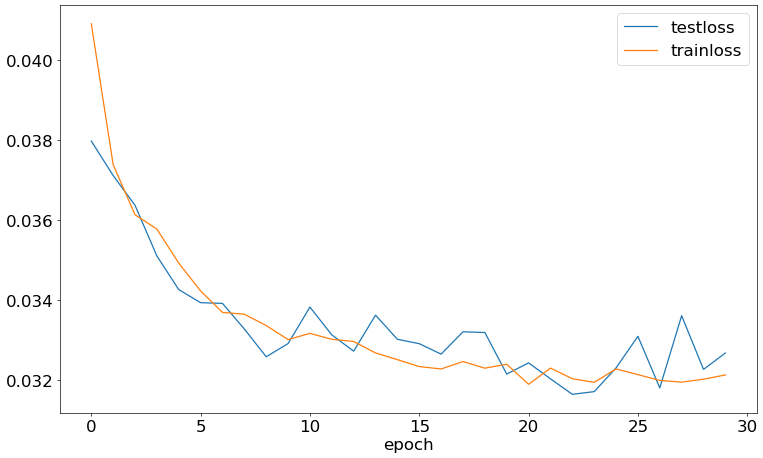

In [108]:
df1.plot('epoch',{'testloss','trainloss'})

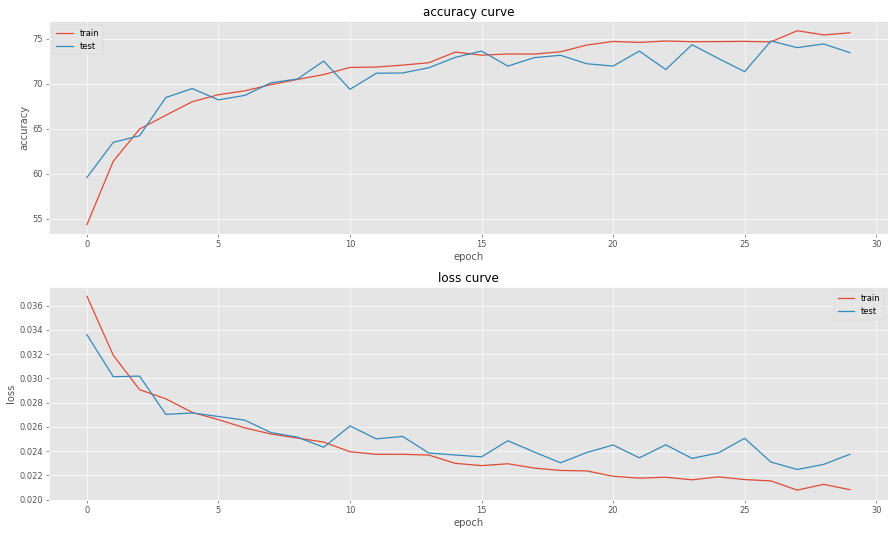

In [14]:
'''
visualized accuracy and losses
'''



<hr><br>

##### **Inline Practice 4**  

1) 여러분의 Custom LeNet을 만들어보세요.
  - 커널(필터)의 크기와 개수를 증가시켜보세요. <파라미터 수 증가>
  - FC layer의 차원을 증가시켜보세요. <파라미터 수 증가>
2) 학습(train) 및 검증(test)을 수행하세요.
3) 성능 향상이 되었는지 시각화해보세요.



<br><hr>

In [70]:
import torch.nn as nn
import torch.nn.functional as F



class CustomLeNet(nn.Module):
    def __init__(self):
        super(CustomLeNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=30, kernel_size=5, stride=1)
        self.maxp1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=30, out_channels=50, kernel_size=5, stride=1) 
        self.maxp2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(in_features=50*13*13, out_features=500) 
        self.Re1 = nn.ReLU()
        self.fc2 = nn.Linear(in_features=500, out_features=200)
        self.fc3 = nn.Linear(in_features=200, out_features=6)

    def forward(self, x):
        x = self.conv1(x) 
        x = torch.tanh(x) # 활성함수 

        x = self.maxp1(x)

        x = self.conv2(x) 
        x = torch.tanh(x) 

        x = self.maxp2(x)

        x = x.view(-1, 50*13*13)
         
        x = self.fc1(x) 
        x = torch.tanh(x) 

        x = self.Re1(x)

        x = self.fc2(x) 
        x = torch.tanh(x)

        x = self.fc3(x) 
        x = torch.tanh(x)


        return x

In [71]:
import torchsummary

_device = device.type

model = CustomLeNet().to(device)
torchsummary.summary(model, (3, 64, 64), device=_device)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 30, 60, 60]           2,280
         MaxPool2d-2           [-1, 30, 30, 30]               0
            Conv2d-3           [-1, 50, 26, 26]          37,550
         MaxPool2d-4           [-1, 50, 13, 13]               0
            Linear-5                  [-1, 500]       4,225,500
              ReLU-6                  [-1, 500]               0
            Linear-7                  [-1, 200]         100,200
            Linear-8                    [-1, 6]           1,206
Total params: 4,366,736
Trainable params: 4,366,736
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.05
Forward/backward pass size (MB): 1.36
Params size (MB): 16.66
Estimated Total Size (MB): 18.07
----------------------------------------------------------------


In [72]:
def train(model, epoch, optimizer, criterion, data_loader):
    print(f"[train epoch : {epoch}]")
    model.train()

    losses = 0.
    correct = 0
    total = 0
    for inputs, targets in data_loader:
        inputs = inputs.to(device)
        targets = targets.to(device)

        outputs = model(inputs)
        loss = criterion(outputs, targets)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        losses += loss.item()
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()
    print(f"train accuracy : {100. * (correct / total):.3f}")
    print(f"train average loss : {losses / total:.3f}")

    return (100. * correct / total, losses / total)

def test(model, epoch, criterion, data_loader):
    print(f"[test epoch : {epoch}]")
    model.eval()

    losses = 0.
    correct = 0
    total = 0    
    
    for inputs, targets in data_loader:
        inputs = inputs.to(device)
        targets = targets.to(device)

        outputs = model(inputs)
        loss = criterion(outputs, targets)
        losses += loss.item()

        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()        

    print(f"test accuracy : {100. * (correct / total):.3f}")
    print(f"test average loss : {losses / total:.3f}")

    return (100. * correct / total, losses / total)


In [101]:
import pandas as pd
df2 = pd.DataFrame(index=range(0,30), columns=['epoch', 'testacc','trainacc','testloss','trainloss'])

In [103]:
import time
import torch.optim as optim
from torch.utils.data import  TensorDataset, DataLoader

model = CustomLeNet()
model = model.to(device)

'''
input options
'''



criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005)
epochs = 30


train_result = []
test_result = []

start_time = time.time()
for epoch in range(epochs):
    '''
    train, test
    '''

    train_acc , train_loss = train(model, epoch, optimizer, criterion, train_data_loader)

    test_acc , test_loss = test(model, epoch, criterion, test_data_loader)

    df2['epoch'][epoch] = epoch
    df2['testacc'][epoch] = test_acc
    df2['trainacc'][epoch] = train_acc
    df2['testloss'][epoch] = test_loss
    df2['trainloss'][epoch] = train_loss
   
    
    # model_save
    if not os.path.isdir('checkpoint'):
        os.mkdir('checkpoint')
    torch.save(model.state_dict(), './checkpoint/model2.pt')
    print(f"model save. ({time.time() - start_time:.3f}sec)\n\n")

    train_result.append((train_acc, train_loss))
    test_result.append((test_acc, test_loss))


[train epoch : 0]
train accuracy : 50.693
train average loss : 0.041
[test epoch : 0]
test accuracy : 55.474
test average loss : 0.039
model save. (44.695sec)


[train epoch : 1]
train accuracy : 57.232
train average loss : 0.038
[test epoch : 1]
test accuracy : 59.466
test average loss : 0.037
model save. (91.739sec)


[train epoch : 2]
train accuracy : 58.487
train average loss : 0.037
[test epoch : 2]
test accuracy : 61.520
test average loss : 0.036
model save. (139.610sec)


[train epoch : 3]
train accuracy : 60.351
train average loss : 0.036
[test epoch : 3]
test accuracy : 58.996
test average loss : 0.036
model save. (187.166sec)


[train epoch : 4]
train accuracy : 62.963
train average loss : 0.035
[test epoch : 4]
test accuracy : 65.542
test average loss : 0.034
model save. (234.976sec)


[train epoch : 5]
train accuracy : 64.123
train average loss : 0.035
[test epoch : 5]
test accuracy : 65.776
test average loss : 0.034
model save. (282.601sec)


[train epoch : 6]
train accura

In [5]:
qqq = torch.load('./checkpoint/model.pt')

In [6]:
print(qqq)

OrderedDict([('conv1.weight', tensor([[[[ 7.7832e-02,  7.0985e-02, -5.6598e-02,  5.7396e-03, -9.5640e-02],
          [-2.5920e-02,  8.5328e-02,  5.2068e-02,  4.6193e-02, -1.2658e-01],
          [-1.1678e-01, -5.1358e-02, -3.5463e-02, -9.6299e-02, -1.1924e-01],
          [-9.0148e-02, -9.0500e-02, -2.6558e-02, -1.2867e-01, -5.5915e-02],
          [ 1.0794e-01,  7.6012e-02,  8.9070e-02,  3.7448e-02,  8.9111e-02]],

         [[ 1.0112e-01, -2.9070e-02,  1.3640e-01,  5.4795e-02, -2.8110e-02],
          [ 5.8772e-02,  7.5562e-02,  2.5570e-03,  3.3243e-02,  2.0225e-02],
          [-7.2685e-02,  2.9549e-02,  5.7646e-03, -1.5641e-02,  7.0770e-02],
          [-9.3762e-02,  8.0532e-02, -2.6191e-03, -6.7782e-02, -1.3856e-02],
          [ 1.1856e-01, -2.7274e-02, -6.5369e-03,  4.5903e-02,  5.7263e-02]],

         [[ 3.7525e-02,  3.5339e-02, -3.9997e-02, -8.3811e-03,  4.7784e-02],
          [-6.9600e-02, -8.7895e-02, -1.3640e-01, -1.4408e-01,  3.6549e-02],
          [ 6.0538e-02, -8.1295e-02, -2.70

In [109]:
df2.to_csv('./checkpoint/df2.csv',index= False)

In [110]:
df2 = pd.read_csv('./checkpoint/df2.csv')

<AxesSubplot:xlabel='epoch'>

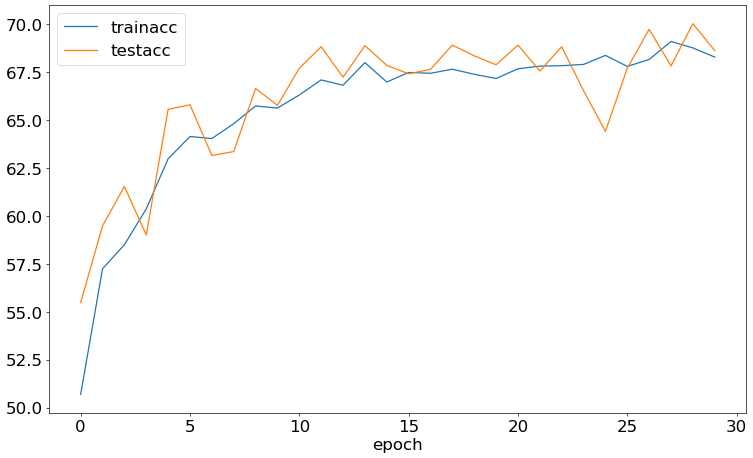

In [111]:
df2.plot('epoch',{'testacc','trainacc'})

<AxesSubplot:xlabel='epoch'>

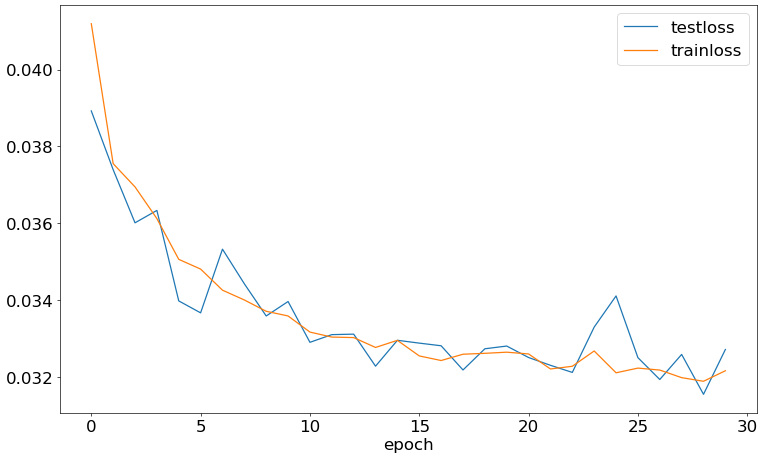

In [112]:
df2.plot('epoch',{'testloss','trainloss'})

In [87]:
df3 = pd.DataFrame(index=range(0,30), columns=['epoch', 'testacc1','testacc2','testloss1','testloss2'])

In [113]:
df3['epoch']=df1['epoch']
df3['testacc1']=df1['testacc']
df3['testacc2']=df2['testacc']
df3['testloss1']=df1['testloss']
df3['testloss2']=df2['testloss']

<AxesSubplot:xlabel='epoch'>

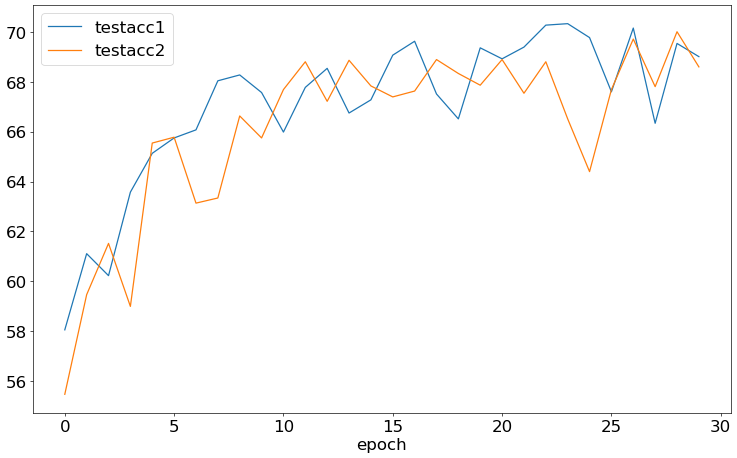

In [114]:
df3.plot('epoch',{'testacc1','testacc2'})

<AxesSubplot:xlabel='epoch'>

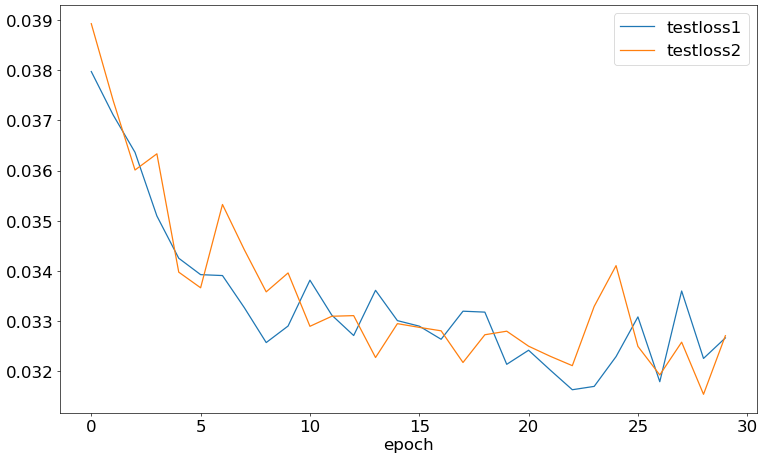

In [115]:
df3.plot('epoch',{'testloss1','testloss2'})